In [1]:
#Importamo las librerías a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore') # Para evitar avisos.
%matplotlib inline

In [2]:
#Cargamos los datos del archivo separado por comas
data_df = pd.read_csv('data.csv')

# 1. Which roads "appear to be" the top 10 most dangerous roads of Monterrey Metropolitan area?

In [3]:
#seleccionamos las 10 calles que aparecen con más frecuencia
data_df['Calle'].value_counts()[0:10]

MORONES PRIETO      1729
LAZARO CARDENAS     1279
GONZALITOS          1229
GARZA SADA          1215
ALFONSO REYES       1153
JOSE VASCONCELOS     964
LEONES               891
AV. LINCOLN          838
CONSTITUCION         823
FIDEL VELAZQUEZ      752
Name: Calle, dtype: int64

<AxesSubplot:>

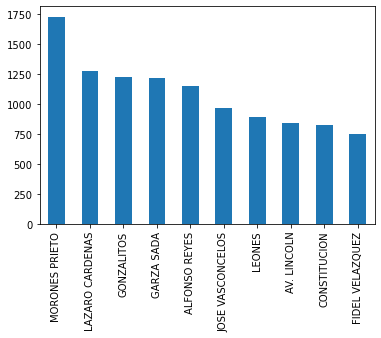

In [10]:
#Para mayor claridad desplegamos una gráfica con la información de las 10 calles que aparecen 
# más frecuentememte en el archivo
data_df['Calle'].value_counts()[0:10].plot(kind='bar')

# 2. What's the age group with the overall highest number of reported colisions? You can consider any age groupings for the purposes of this question. Explain this in a graphical way.


In [11]:
#Obtenemos los nombres de las columnas para identificar con cual de ellas trabajar
data_df.columns

Index(['Column', 'Calle', 'Causa', 'Ciudad', 'Cruce', 'Fecha', 'Hora', 'ID',
       'Latitud', 'Lesionados', 'Longitud', 'Mes', 'Muertos',
       'No. De Infracción', 'Número  total de lesionados',
       'Número total de muertos', 'Por alcohol', 'Sentido',
       'Situación climática', 'Situación del Pavimento', 'Tipo de incidente',
       'Tipo de involucrado', 'Tipo de vía', 'V1_Arresto', 'V1_Dictamen',
       'V1_Edad', 'V1_Estatus Licencia', 'V1_Género', 'V1_No. De Fallecidos',
       'V1_No. De Lesionados', 'V1_Tipo de Vehículo', 'V1_Uso de Cinturón',
       'V2_Arresto', 'V2_Dictamen', 'V2_Edad', 'V2_Estatus Licencia',
       'V2_Género', 'V2_No. De Fallecidos', 'V2_No. De Lesionados',
       'V2_Tipo de Vehículo', 'V2_Uso de Cinturón', 'V3_Arresto',
       'V3_Dictamen', 'V3_Edad', 'V3_Estatus Licencia', 'V3_Género',
       'V3_No. De Fallecidos', 'V3_No. De Lesionados', 'V3_Tipo de Vehículo',
       'V3_Uso de Cinturón'],
      dtype='object')

In [ ]:
#Seleccionaremos la columan V1_Edad que es la que nos proporciona la información del primer vehículo
# involucrado en el accidente
#preparamos función para convertir a números los valores de la columna V1_Edad.
import numpy as np

In [12]:
np.nan

nan

In [13]:
def convert_to_number(x):
    try:
        return float(x)
    except:
        return np.nan
    return x

In [15]:
data_df['V1_Edad'].apply(convert_to_number)


0         NaN
1        57.0
2        34.0
3        27.0
4        39.0
         ... 
55008    69.0
55009    70.0
55010    19.0
55011    15.0
55012    45.0
Name: V1_Edad, Length: 55013, dtype: float64

<AxesSubplot:>

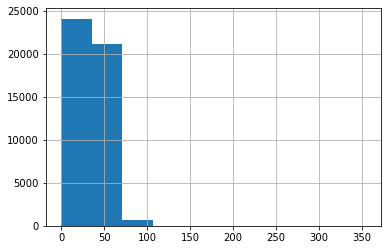

In [14]:
#A través del histograma podemos ver el rango de edades
#Se pudo observar que la calidad de la información no es la mejor, ya que hay varios registros donde la edad
#no estaba disponible
data_df['V1_Edad'].apply(convert_to_number).hist()

# 3. If you were to see a collision in the "Garza Sada" road, What would be the odds for that person to have any type of positive alcohol ingestion opinion?

In [16]:
#Primero fitramos el número de accidentes que hubo en la calle Garza Sada y en lo cuales el alcohol 
# influyó en el accidente. 
#Para eso lo filtramos por las columnas Calle y Por alcohol
#Esto nos dara el número de accidente que tuvieron que ver con alcohol en está calle.
data_df[data_df['Calle'] == 'GARZA SADA']['Por alcohol'].value_counts()

No    428
Sí     82
Name: Por alcohol, dtype: int64

In [17]:
#Sumamos el total de resultados.
sum(data_df[data_df['Calle'] == 'GARZA SADA']['Por alcohol'].value_counts())

510

In [18]:
#Calculando la probabilidad
data_df[data_df['Calle'] == 'GARZA SADA']['Por alcohol'].value_counts()/sum(data_df[data_df['Calle'] == 'GARZA SADA']['Por alcohol'].value_counts())

No    0.839216
Sí    0.160784
Name: Por alcohol, dtype: float64

In [19]:
0.160784*100

16.078400000000002

# 4. Why do you think we use the phrase "appear to be" in question 1? What would you need to be able to speak with more confidence about the answer to that question?


Porque hay varios factores adicionales que necesitan tomarse en cuenta, como la precisión de la medición, por ejemplo hay datos que no se registraron correctamente, lo que impide que la informacón sea totalmente confiable.

Otro factor importante es que no contamos con la información sobre los mapas de población, es decir no sabemos la densidad de población de las calles de que estamso hablando. Se desconce cuantas personas transitan en cada calle, no es lo mismo que en una calle muy transitada solo haya una fracción pequeña de accidentes, que en una calle poco transitada haya una gran cantidad de accidentes.

# 5. What modelling project would you push to develop from the conclusions in this dataset?

Para mi es importante trabajar en un modelo que muestre la relación de accidentes-alcohol. Estudiando este modelo podemos encontrar el número de accidentes relacionados al alcohol, los meses en que los accidentes aumentan, el número de lesionados y muertos donde el alcohol está involucrado, esto puede ayudar a implementar medidas que reduzcan los accidentes causados por alcohol